<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_0_4_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_0.4'

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n30.csv')

In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,31.776363,62.141234,94.879257,0.786228,199.583081,197.316958,2.266123
1,0.0,1.0,46.844829,94.370598,48.304240,-9.766094,189.753572,196.409619,-6.656047
2,0.0,2.0,51.338855,59.560494,43.306653,5.370924,169.576925,163.022329,6.554596
3,0.0,3.0,82.638500,90.399364,45.291731,-1.920665,226.408931,227.086175,-0.677244
4,0.0,4.0,24.421085,62.320292,35.603040,-1.678589,130.665827,129.619865,1.045963
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,63.968026,84.888617,58.945364,-12.392050,205.409957,217.882442,-12.472486
29996,999.0,26.0,99.454714,41.927944,78.090249,-9.586677,219.886230,227.276153,-7.389923
29997,999.0,27.0,73.604598,66.140428,31.335365,4.658764,185.739156,181.260989,4.478167
29998,999.0,28.0,90.602145,56.440041,46.562467,-0.612434,202.992218,202.664290,0.327928


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    31.776363  62.141234  94.879257  ...  199.583081  197.316958   2.266123
      1.0    46.844829  94.370598  48.304240  ...  189.753572  196.409619  -6.656047
      2.0    51.338855  59.560494  43.306653  ...  169.576925  163.022329   6.554596
      3.0    82.638500  90.399364  45.291731  ...  226.408931  227.086175  -0.677244
      4.0    24.421085  62.320292  35.603040  ...  130.665827  129.619865   1.045963
...                ...        ...        ...  ...         ...         ...        ...
999.0 25.0   63.968026  84.888617  58.945364  ...  205.409957  217.882442 -12.472486
      26.0   99.454714  41.927944  78.090249  ...  219.886230  227.276153  -7.389923
      27.0   73.604598  66.140428  31.335365  ...  185.739156  181.260989   4.478167
      28.0   90.602145  56.440041  46.562467  ...  202.992218  202.664290   0.327928
      29.0   98.137650  97.354211  36.336523  ...  242.048345  241.286061   0.762283

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    31.776363  62.141234  94.879257  ...  199.583081  197.316958   2.266123
      1.0    46.844829  94.370598  48.304240  ...  189.753572  196.409619  -6.656047
      2.0    51.338855  59.560494  43.306653  ...  169.576925  163.022329   6.554596
      3.0    82.638500  90.399364  45.291731  ...  226.408931  227.086175  -0.677244
      4.0    24.421085  62.320292  35.603040  ...  130.665827  129.619865   1.045963
...                ...        ...        ...  ...         ...         ...        ...
999.0 25.0   63.968026  84.888617  58.945364  ...  205.409957  217.882442 -12.472486
      26.0   99.454714  41.927944  78.090249  ...  219.886230  227.276153  -7.389923
      27.0   73.604598  66.140428  31.335365  ...  185.739156  181.260989   4.478167
      28.0   90.602145  56.440041  46.562467  ...  202.992218  202.664290   0.327928
      29.0   98.137650  97.354211  36.336523  ...  242.048345  241.286061   0.762283

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,31.776363,62.141234,94.879257,0.786228,199.583081,197.316958,2.266123
1,0.0,1.0,46.844829,94.370598,48.304240,-9.766094,189.753572,196.409619,-6.656047
2,0.0,2.0,51.338855,59.560494,43.306653,5.370924,169.576925,163.022329,6.554596
3,0.0,3.0,82.638500,90.399364,45.291731,-1.920665,226.408931,227.086175,-0.677244
4,0.0,4.0,24.421085,62.320292,35.603040,-1.678589,130.665827,129.619865,1.045963
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,63.968026,84.888617,58.945364,-12.392050,205.409957,217.882442,-12.472486
29996,999.0,26.0,99.454714,41.927944,78.090249,-9.586677,219.886230,227.276153,-7.389923
29997,999.0,27.0,73.604598,66.140428,31.335365,4.658764,185.739156,181.260989,4.478167
29998,999.0,28.0,90.602145,56.440041,46.562467,-0.612434,202.992218,202.664290,0.327928


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    31.776363  62.141234  94.879257  ...  199.583081  197.316958   2.266123
      1.0    46.844829  94.370598  48.304240  ...  189.753572  196.409619  -6.656047
      2.0    51.338855  59.560494  43.306653  ...  169.576925  163.022329   6.554596
      3.0    82.638500  90.399364  45.291731  ...  226.408931  227.086175  -0.677244
      4.0    24.421085  62.320292  35.603040  ...  130.665827  129.619865   1.045963
...                ...        ...        ...  ...         ...         ...        ...
999.0 25.0   63.968026  84.888617  58.945364  ...  205.409957  217.882442 -12.472486
      26.0   99.454714  41.927944  78.090249  ...  219.886230  227.276153  -7.389923
      27.0   73.604598  66.140428  31.335365  ...  185.739156  181.260989   4.478167
      28.0   90.602145  56.440041  46.562467  ...  202.992218  202.664290   0.327928
      29.0   98.137650  97.354211  36.336523  ...  242.048345  241.286061   0.762283

[30000 rows x 7 columns]

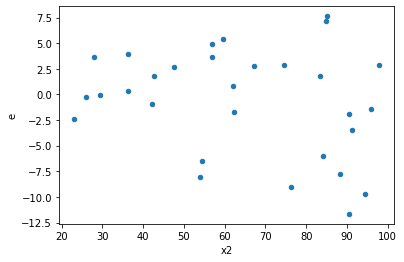

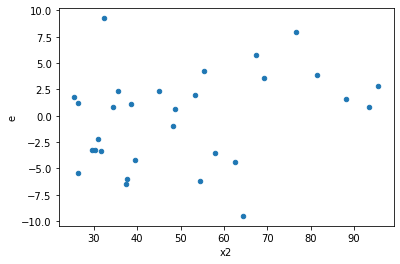

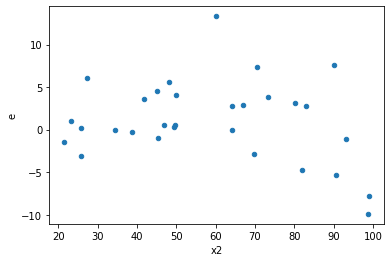

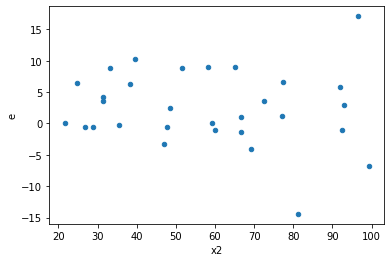

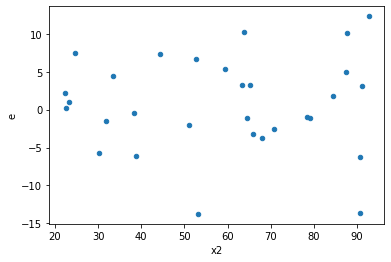

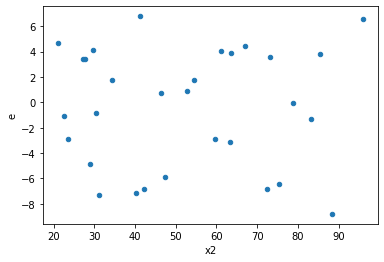

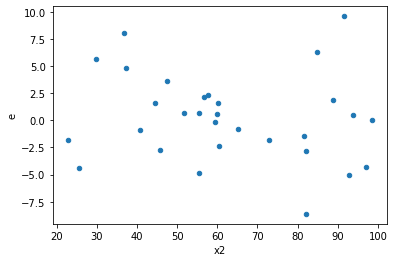

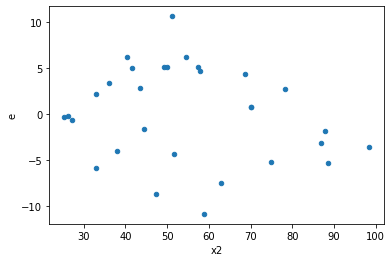

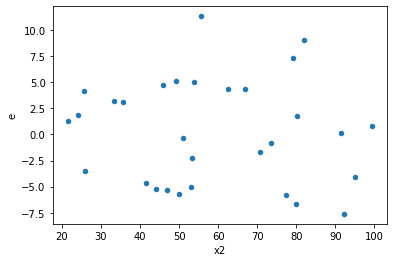

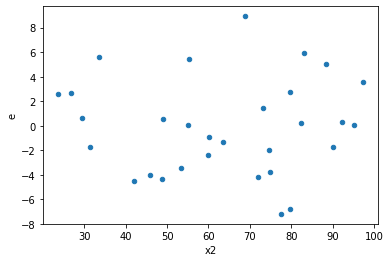

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
1.0,9.0,15.0,85.03069095080158,362.3955036713475,10.628836368850198,25.885393119381966,2.5571625935465683,0.15791918008417682,0.9210404099579116,Reject001=1 : Homoscedasticity
6.0,9.0,15.0,158.60620238437252,277.05703096276164,19.825775298046565,19.789787925911547,1.04809405987036,0.978702838232347,0.5106485808838265,Reject001=1 : Homoscedasticity
9.0,14.0,10.0,206.45123814748777,146.87800841503773,15.880864472883674,16.319778712781968,0.9960183025599114,0.9790763040949957,0.5104618479525022,Reject001=1 : Homoscedasticity
14.0,16.0,8.0,543.4767817151358,307.0258637362381,36.23178544767572,43.86083767660544,1.1298582536214627,0.7908798771931871,0.6045600614034065,Reject001=1 : Homoscedasticity
15.0,13.0,11.0,263.85146260184865,358.58373100841277,21.98762188348739,35.85837310084128,1.6061338786263495,0.412903926275082,0.793548036862459,Reject001=1 : Homoscedasticity
16.0,14.0,10.0,325.7345833214089,351.2397658006382,25.056506409339143,39.02664064451536,1.5096207074693326,0.46715155810073505,0.7664242209496325,Reject001=1 : Homoscedasticity
17.0,12.0,12.0,231.8635340651389,435.3823712615552,21.07850309683081,39.58021556923229,1.8777526747230568,0.2889687653469839,0.855515617326508,Reject001=1 : Homoscedasticity
18.0,13.0,11.0,380.467691632546,409.89959824767124,31.705640969378834,40.989959824767126,1.2732403002484722,0.6704837887721182,0.6647581056139409,Reject001=1 : Homoscedasticity
21.0,11.0,13.0,333.6926615917297,438.3940489325397,33.369266159172966,36.53283741104497,1.1116480921869323,0.8710367816962585,0.5644816091518707,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,16.0,299.29853825621086,321.64075350660806,42.75693403660155,21.442716900440537,0.5373242973062424,0.2763379636548748,Reject001=1 : Homoscedasticity
1.0,9.0,15.0,85.03069095080158,362.3955036713475,10.628836368850198,25.885393119381966,2.5571625935465683,0.15791918008417682,Reject001=1 : Homoscedasticity
2.0,10.0,14.0,174.80094304825607,240.349705538553,19.422327005361787,18.488438887581,0.9821363552459349,0.9497227500668177,Reject001=1 : Homoscedasticity
3.0,11.0,13.0,458.7891820330708,407.9680469901663,45.87891820330708,33.997337249180525,0.7524234345257927,0.6183398569220613,Reject001=1 : Homoscedasticity
4.0,10.0,14.0,170.7647014086612,232.2796887064631,18.97385571207347,17.867668362035623,0.9715946093842095,0.9353436634789573,Reject001=1 : Homoscedasticity
5.0,13.0,11.0,393.8769844259058,156.78018281463343,32.82308203549215,15.678018281463343,0.47041507355189793,0.21804522370831747,Reject001=1 : Homoscedasticity
6.0,9.0,15.0,158.60620238437252,277.05703096276164,19.825775298046565,19.789787925911547,1.04809405987036,1.021297161767653,Reject001=1 : Homoscedasticity
7.0,10.0,14.0,240.33103080218555,283.991448665003,26.703447866909507,21.84549605115408,0.8440484530176272,0.7508015507041568,Reject001=1 : Homoscedasticity
8.0,12.0,12.0,306.0091506069764,181.45101104439482,27.819013691543308,16.495546458581348,0.5929594284500396,0.3779301741574609,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      972
Reject001=0 : Heteroscedasticity     28
Name: Result_test, dtype: int64